In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

ELA_0 = np.genfromtxt("ELA_spitsbergen.txt")

[x1,y1] = np.genfromtxt("elevation_1.txt")

tributary_data = np.genfromtxt('Glacierbuckets.csv', delimiter=";", skip_header=1, usecols=(1,2,3,4,5,6,7))

veteranen_width = 2930
parameters = [alpha, beta, nu, kappa, c, w, L0] = np.genfromtxt("parameters_veteranen.txt")

figsize = (8,4)
dpi = 300

## Steady State

In [2]:
summer = CustomBedModel(x1, y1, name="Veteranen - Summer", w=veteranen_width)
winter = CustomBedModel(x1, y1, name="Veteranen - Winter", w=veteranen_width)

glaciers = [winter, summer]

for glacier in glaciers:   
    glacier.width_glacier = 2930
    for [L, w0, h0, w1, h1, s, q] in tributary_data:
        glacier.add_bucket_tributary(L, w0, w1, h0, h1)

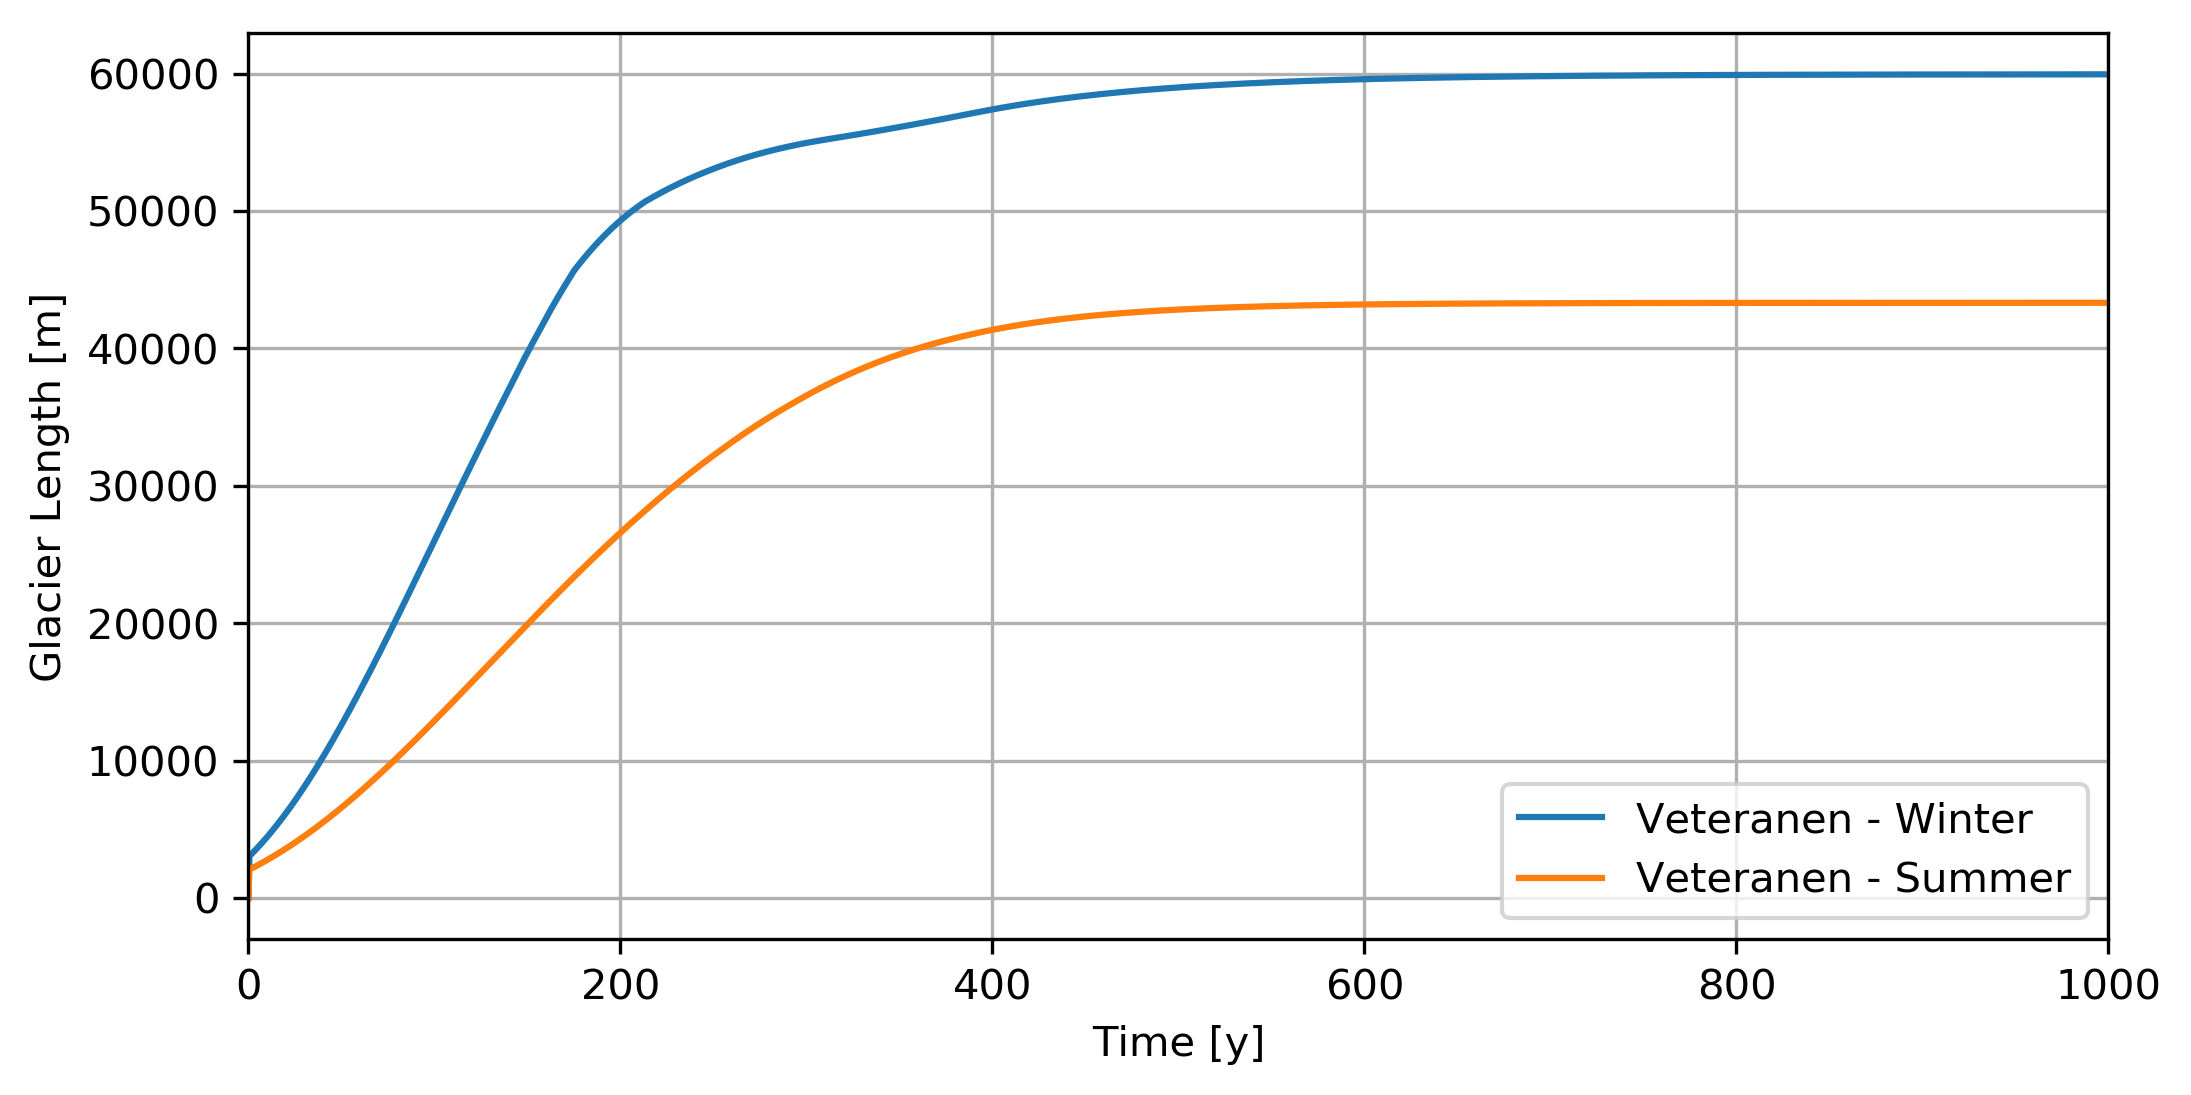

In [3]:
dt = 0.5
t = 1000

E_0 = 0
E_var = 100
E_2016 = E_0 + ELA_0[-1,1]

plt.figure(figsize=figsize, dpi=dpi)

for glacier in glaciers:
    glacier.alpha = 1.2
    glacier.beta = 0.007
    glacier.nu = 10
    glacier.kappa = 0.3
    glacier.c = 1.2

summer.integrate(dt=dt, time=t, E=E_2016+E_var)
winter.integrate(dt=dt, time=t, E=E_2016-E_var)
    
for glacier in glaciers:
    plt.plot(glacier.t, glacier.L, label=glacier.name)
    
plt.legend()
plt.grid()
# plt.title("Glacier length")

# plt.plot([np.min(summer.t), np.max(summer.t)], 2*[42000], "--", c="gray", linewidth=1) # real summer
# plt.plot([np.min(summer.t), np.max(summer.t)], 2*[60000], "--", c="gray", linewidth=1) # real winter

plt.xlim([np.min(summer.t), np.max(summer.t)])
plt.xlabel("Time [y]")
plt.ylabel("Glacier Length [m]")
if np.max(summer.t) == t:
    plt.savefig("figures/calibration.png")
plt.show()

L0_summer = summer.L_last
L0_winter = winter.L_last

parameters = [alpha, beta, nu, kappa, c, w, L0] = np.array([summer.alpha, summer.beta, summer.nu, summer.kappa, summer.c, summer.w, summer.L_last])
np.savetxt("parameters_veteranen.txt", parameters)